In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("lotus_metfrag_scores.csv")

In [3]:
cfmid = pd.read_csv("lotus_cfmid_scores.csv")

In [4]:
metfrag_inchikeys = set(df.inchikey)
cfmid_inchikeys = set(cfmid.inchikey_msg)

# we only want to keep the intersection of the two sets
intersection_inchikeys = metfrag_inchikeys.intersection(cfmid_inchikeys)

cfmid = cfmid[cfmid.inchikey_msg.isin(intersection_inchikeys)]
df = df[df.inchikey.isin(intersection_inchikeys)]

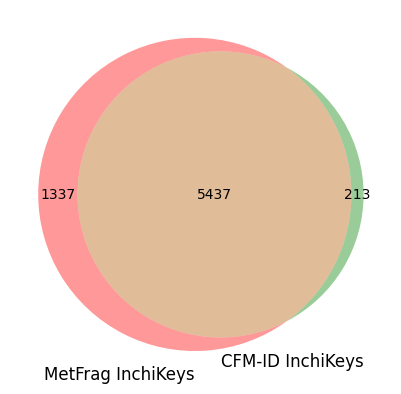

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2(
    [metfrag_inchikeys, cfmid_inchikeys],
    ("MetFrag InchiKeys", "CFM-ID InchiKeys"),
)

Text(0.5, 1.0, 'Distribution of MetFrag Scores')

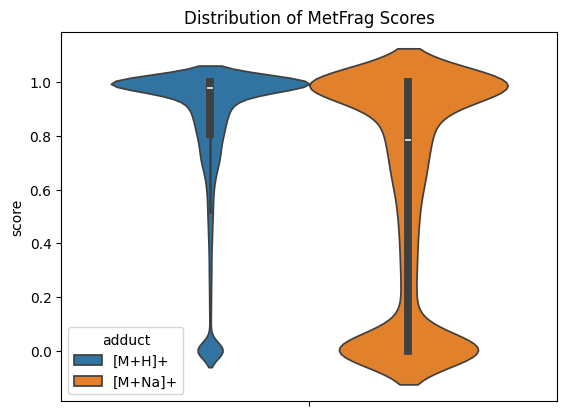

In [29]:
sns.violinplot(
    y=df["score"],
    data=df,
    hue="adduct",
).set_title("Distribution of MetFrag Scores")

[Text(0.5, 1.0, 'MetFrag Top N Distribution')]

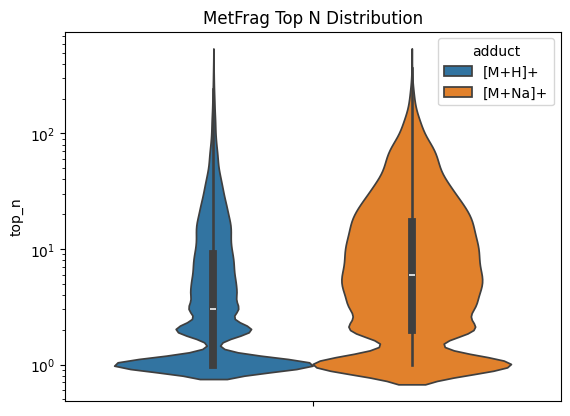

In [28]:
sns.violinplot(
    y="top_n",
    data=df,
    hue="adduct",
    log_scale=True,
    # log scale for y axis
).set(
    title="MetFrag Top N Distribution",
)

In [7]:
df.drop(columns="n_empty").describe()

,score,top_n
count,71402.000000,71402.000000
mean,0.789936,11.140976
std,0.326364,23.787785
min,0.000000,1.000000
25%,0.738670,1.000000
50%,0.962713,3.000000
75%,1.000000,11.000000
max,1.000000,408.000000


In [8]:
df[df["adduct"] == "[M+H]+"].describe()

,n_empty,score,top_n
count,57465.0,57465.000000,57465.000000
mean,12646.0,0.838033,10.096668
std,0.0,0.276899,23.224773
min,12646.0,0.000000,1.000000
25%,12646.0,0.807037,1.000000
50%,12646.0,0.976510,3.000000
75%,12646.0,1.000000,9.000000
max,12646.0,1.000000,408.000000


In [9]:
df[df["adduct"] == "[M+Na]+"].describe()

,n_empty,score,top_n
count,13937.0,13937.000000,13937.000000
mean,12646.0,0.591624,15.446868
std,0.0,0.425086,25.534323
min,12646.0,0.000000,1.000000
25%,12646.0,0.000000,2.000000
50%,12646.0,0.785826,6.000000
75%,12646.0,1.000000,17.000000
max,12646.0,1.000000,368.000000


## CFM-ID

In [10]:
cfmid["rank_per_spectra"] = (
    cfmid.groupby("feature_id")["msms_score"]
    .rank(method="min", ascending=False)
    .astype(int)
)

cfmid["is_correct_hit"] = cfmid["inchikey_isdb"] == cfmid["inchikey_msg"]

In [11]:
cfmid_res = cfmid[cfmid.is_correct_hit == True]

In [12]:
cfmid_res.describe()

,msms_score,matched_peaks,feature_id,reference_id,rank_per_spectra
count,57274.000000,57274.000000,57274.000000,57274.000000,57274.000000
mean,0.419277,10.335283,31136.281489,54929.035828,8.111307
std,0.300774,11.031849,18288.883391,42865.135447,21.352482
min,0.000000,0.000000,0.000000,102.000000,1.000000
25%,0.135042,3.000000,15369.250000,17009.000000,1.000000
50%,0.417494,7.000000,30532.500000,43740.000000,2.000000
75%,0.679817,14.000000,46635.750000,88959.000000,6.000000
max,0.998359,135.000000,64086.000000,148818.000000,393.000000


In [13]:
cfmid_res[cfmid_res.instrument == "Orbitrap"].describe()

,msms_score,matched_peaks,feature_id,reference_id,rank_per_spectra
count,35902.000000,35902.000000,35902.000000,35902.000000,35902.000000
mean,0.384348,9.176508,31955.180463,54499.462732,8.000056
std,0.306703,10.433073,19463.176414,43866.606078,21.734955
min,0.000000,0.000000,0.000000,102.000000,1.000000
25%,0.072665,2.000000,15454.500000,15948.000000,1.000000
50%,0.360278,6.000000,31155.500000,43092.000000,2.000000
75%,0.655220,12.000000,51269.750000,89714.000000,6.000000
max,0.998103,135.000000,64072.000000,148818.000000,367.000000


In [14]:
cfmid_res[cfmid_res.instrument == "QTOF"].describe()

,msms_score,matched_peaks,feature_id,reference_id,rank_per_spectra
count,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000
mean,0.484980,11.155612,28465.786351,54420.621256,7.968235
std,0.283222,10.645960,15936.515870,40997.476715,19.489193
min,0.000000,0.000000,10.000000,102.000000,1.000000
25%,0.242657,4.000000,12984.250000,18324.000000,1.000000
50%,0.500015,8.000000,29238.500000,43740.000000,2.000000
75%,0.724840,14.000000,39309.500000,85418.000000,7.000000
max,0.998359,107.000000,64086.000000,148626.000000,393.000000


<Axes: ylabel='rank_per_spectra'>

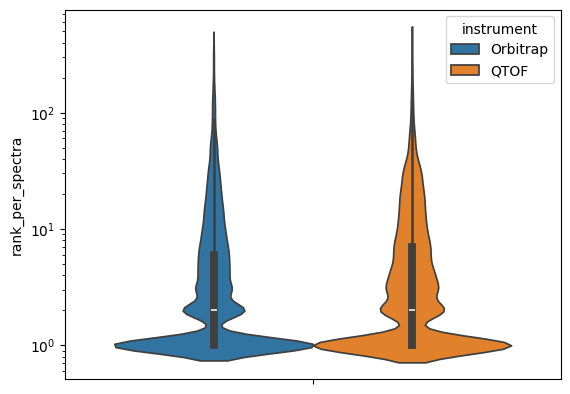

In [15]:
sns.violinplot(
    y="rank_per_spectra",
    data=cfmid_res,
    hue="instrument",
    log_scale=True,
)

<Axes: ylabel='msms_score'>

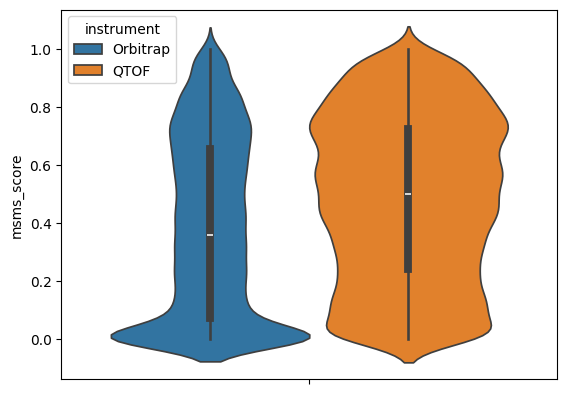

In [16]:
sns.violinplot(
    y="msms_score",
    data=cfmid_res,
    hue="instrument",
)

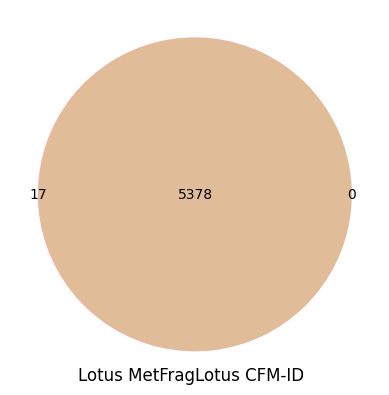

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

lotus_metfrag = set(df[df.adduct == "[M+H]+"].inchikey)  # metfrag results
lotus_cfm = set(cfmid_res.inchikey_msg)

venn2(
    [lotus_metfrag, lotus_cfm],
    ("Lotus MetFrag", "Lotus CFM-ID"),
)

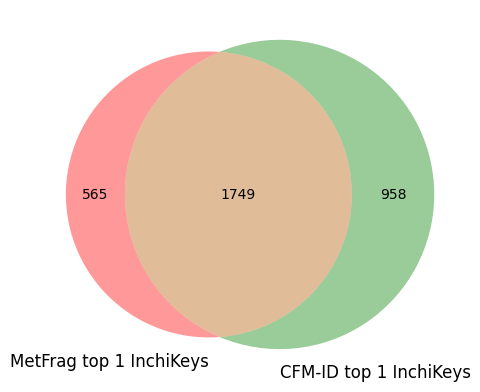

In [23]:
venn2(
    [
        set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].inchikey),
        set(cfmid_res[cfmid_res.rank_per_spectra == 1].inchikey_msg),
    ],
    ("MetFrag top 1 InchiKeys", "CFM-ID top 1 InchiKeys"),
)